<a href="https://colab.research.google.com/github/Shashankshekharpandey/Online-retail-customer-segmentation/blob/main/Online_retail_customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Description**<br>
In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [1]:
# importing libraries
import numpy as np                 # importing numpy library for any numerical computation on data
import pandas as pd                # importing pandas library for data preprocessing 
import matplotlib.pyplot as plt    # importing matplotlib and seaborn library for data visualization
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading our Dataset
data = pd.read_excel("Online Retail.xlsx")

In [3]:
# head gives the top 5 rows of the given dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
# info() print the basic information of our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.describe()   # describe function is used to get a descriptive statistics summary of a given dataframe

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#  Shape give the total number of rows and columns
print('Rows : {} , Columns : {} '.format(data.shape[0], data.shape[1]))

Rows : 541909 , Columns : 8 


**Preprocessing the dataset**

In [8]:
# lets check the total null values in our dataset.
# sort_values sorting the dataset in ascending order and if you want to make it reverse just write False in bracket.
print(data.isna().sum().sort_values(ascending = False))

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


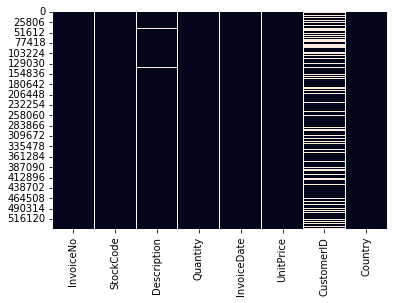

In [9]:
# Plot the heat map to show the occurance of missing values in our dataframe
sns.heatmap(data.isnull(), cbar=False)

**Handling duplicate values:-**

In [10]:
# dropping all the missing values from our dataset 
data.dropna(inplace=True)

In [11]:
# find the sum of missing values to check whether any missing value is left or not
data.isna().sum().sort_values()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Checking the total number of duplicate values 
print('Duplicate values in our dataset is:',len(data[data.duplicated()]))

Duplicate values in our dataset is: 5225


In [13]:
# Dropping the duplicate values from the dataset
data.drop_duplicates(inplace = True)

In [14]:
# Rows and column left after removing duplicate and null values
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 401604 , Columns 8


After dropping Null and duplicate values we see that 401604 rows and 8 columns are there in this dataset.

In [15]:
# Creating a copy of dataframe 
customer_seg_df = data.copy()

Checking for the rows which are cancelled

In [16]:
# Lets check the InvoiceNo that starts with 'C'.Here 'C' denotes cancellation 
customer_seg_df[customer_seg_df['InvoiceNo'].str.contains("C") == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
customer_seg_df.InvoiceNo.dtypes

dtype('O')

In [18]:
# First converting the column as string
customer_seg_df['InvoiceNo'] = customer_seg_df['InvoiceNo'].astype('str')

In [19]:
# We have to deal with those transaction of which InvoiceNo not contain 'C'
customer_seg_df = customer_seg_df[~customer_seg_df['InvoiceNo'].str.contains('C')]
customer_seg_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [20]:
# Rows and column left after removing cancelled invoice no. record 
print('Rows {} , Columns {}'.format(customer_seg_df.shape[0], customer_seg_df.shape[1]))

Rows 392732 , Columns 8


**Now,the dataframe got changed and contain only those transaction that are not cancelled**

In [21]:
# Count the no. of rows in each column
customer_seg_df.count()

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
dtype: int64

**Find the top 5 products which have maximum sales.**

In [22]:
# Find the count of each product and then select top 5 using head() method
top_5_prod_df = pd.DataFrame(customer_seg_df['Description'].value_counts().head(5).reset_index().values,columns=['Description','Count'])
top_5_prod_df

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [23]:
# Find the count of each product and then select top 5 using head() method
top_5_prod_df = pd.DataFrame(customer_seg_df['Description'].value_counts().head(5).reset_index().values,columns=['Description','Count'])
top_5_prod_df

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


Text(0, 0.5, 'Total Sales')

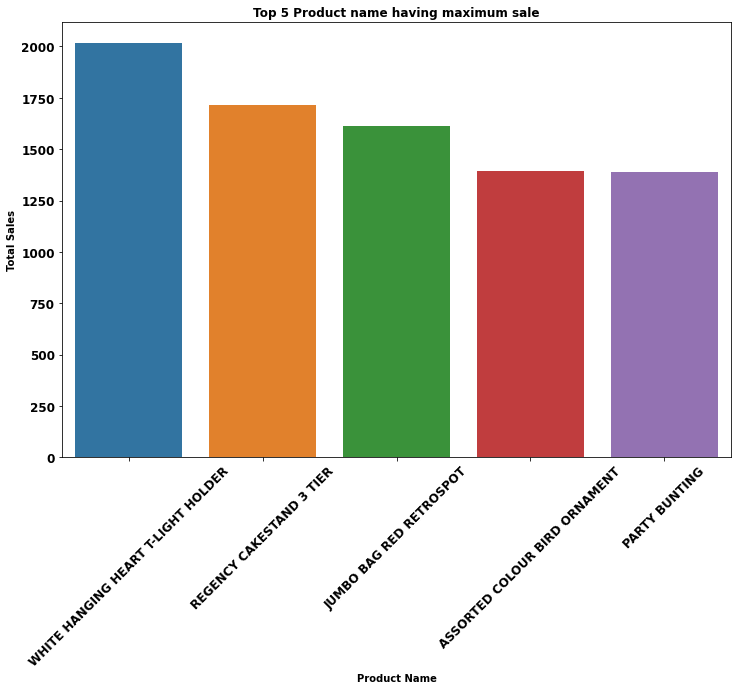

In [24]:
# Count plot to show top 5 products
plt.figure(figsize = (12,8))
plt.title('Top 5 Product name having maximum sale' ,  fontweight = 'bold')
sns.barplot(x = 'Description',y = 'Count', data = top_5_prod_df )
plt.xticks(rotation = 45 , fontweight = 'bold' , fontsize = 12)
plt.yticks(fontweight = 'bold' , fontsize = 12)
plt.xlabel('Product Name',fontweight = 'bold' , fontsize = 10)
plt.ylabel('Total Sales', fontweight = 'bold' , fontsize = 10)

**Conclusion**<br>
From the above graph,we conclude that the top-most 5 selling products are:<br>

WHITE HANGING HEART T-LIGHT HOLDER<br>
REGENCY CAKESTAND 3 TIER<br>
JUMBO BAG RED RETROSPOT<br>
ASSORTED COLOUR BIRD ORNAMENT<br>
PARTY BUNTING<br>

Find out the top 5 countries which have maximum orders.

In [25]:
# Top countries who's buying maximum products
Top_10_country = customer_seg_df['Country'].value_counts().reset_index()
Top_10_country['Country_per']= Top_10_country['Country']*100/customer_seg_df['Country'].count()     # Add country percentage column to top 10 countries data frame
Top_10_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_10_country.head()

,Country_Name,Count,Country_per
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474


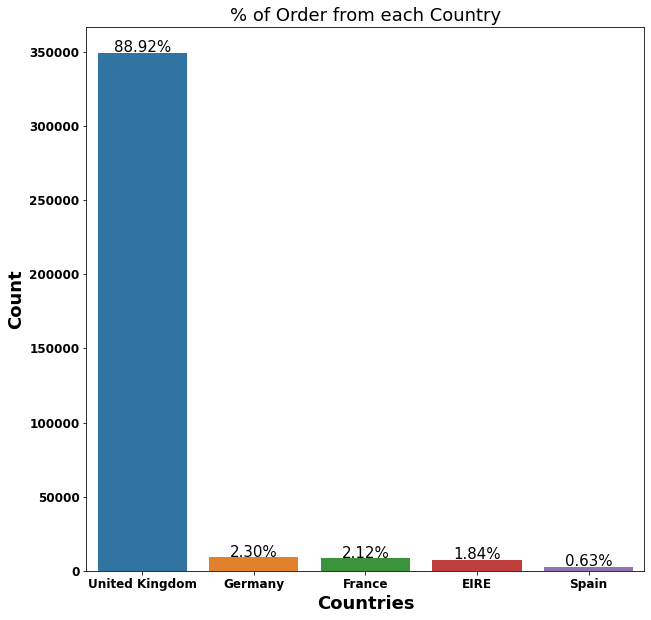

In [26]:
# Barplot of Top 10 countries who's buying maximum products
fig, ax = plt.subplots(figsize = (10,10))
splot = sns.barplot(x='Country_Name',y='Count',data=Top_10_country.head())
plt.title('% of Order from each Country', SIZE = 18)
plt.xlabel('Countries', SIZE = 18 , fontweight = 'bold')
plt.ylabel('Count', SIZE = 18, fontweight = 'bold')
plt.xticks(fontweight = 'bold' , fontsize = 12)
plt.yticks(fontweight = 'bold' , fontsize = 12)
for p in splot.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/customer_seg_df.shape[0]*100),ha = "center", SIZE = 15)

In [27]:
# customer distribution in 1 year time period
customer_distribution = customer_seg_df.groupby('InvoiceDate')['CustomerID'].count().reset_index(name="Total_Customers")
customer_distribution

,InvoiceDate,Total_Customers
0,2010-12-01 08:26:00,7
1,2010-12-01 08:28:00,2
2,2010-12-01 08:34:00,16
3,2010-12-01 08:35:00,1
4,2010-12-01 08:45:00,20
...,...,...
17281,2011-12-09 12:23:00,2
17282,2011-12-09 12:25:00,2
17283,2011-12-09 12:31:00,21
17284,2011-12-09 12:49:00,4


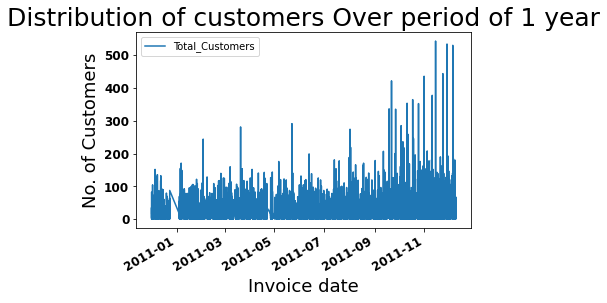

In [28]:
#  plot scatter graph to show no. of customers who are buying prodcut over a time-period of 1 year
customer_distribution.plot.line(x='InvoiceDate', y='Total_Customers')
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=18)
plt.ylabel('No. of Customers', size=18)
plt.xticks(fontweight = 'bold' , fontsize = 12)
plt.yticks(fontweight = 'bold' , fontsize = 12)
plt.show()